<a href="https://colab.research.google.com/github/AlvimSerrao/Boot-Camp-IGTI/blob/master/Desafio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resolução Desafio

In [266]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [206]:
df = pd.read_csv('cars.csv')

In [207]:
df.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.
3,15.0,8,400,150,3761,10,1971,US.
4,30.5,4,98,63,2051,17,1978,US.


In [208]:
# 261 linhas, 8 colunas
# 1 float, 4 int, 3 obj
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    object 
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    object 
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 16.4+ KB


In [209]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [210]:
# A variável 'cubicinches' tem valor " " (vazio)
print(df['cubicinches'].unique())
print(df['cubicinches'].nunique())

['350' '89' '302' '400' '98' '351' '440' '183' '108' '97' '225' '85' '304'
 '113' '107' '86' '121' '200' '91' '71' '250' '120' '199' '231' '80' '232'
 ' ' '455' '318' '122' '141' '340' '116' '156' '90' '360' '168' '305'
 '198' '112' '119' '262' '134' '429' '115' '72' '105' '151' '88' '307'
 '101' '79' '140' '114' '173' '144' '81' '267' '70' '163' '171' '260'
 '131' '68' '96' '135' '390' '146' '258' '83' '76' '383' '130' '110' '454']
75


In [211]:
# A variável 'weightlbs' tem valor " " (vazio)
print(df['weightlbs'].unique())
print(df['weightlbs'].nunique())

['4209' '1925' '3449' '3761' '2051' '3900' '4363' '4312' '3530' '2050'
 '2245' '2188' '4141' '3664' ' ' '4360' '2020' '3433' '2278' '2430' '2019'
 '2600' '3012' '4054' '1968' '1795' '1773' '4657' '3574' '2380' '2130'
 '3278' '2506' '1985' '3415' '1835' '2720' '3955' '3265' '3897' '4638'
 '3645' '3520' '3086' '2635' '3755' '2395' '1940' '3060' '4464' '3190'
 '3609' '2158' '4380' '4278' '2930' '2075' '1937' '3821' '2945' '2379'
 '2910' '2110' '4237' '3525' '1950' '1965' '1825' '3880' '3102' '2640'
 '2288' '2545' '2219' '3015' '3085' '2515' '2265' '2350' '4325' '4952'
 '3425' '2694' '2220' '1613' '2774' '3465' '2125' '1975' '2300' '4100'
 '3329' '2255' '3907' '4499' '3139' '3830' '3781' '4997' '4906' '2126'
 '2200' '2335' '2065' '2671' '3504' '2279' '2933' '4335' '3785' '2740'
 '3039' '2045' '4341' '2202' '1963' '4668' '2745' '1834' '2565' '4654'
 '2230' '2582' '1800' '2678' '4951' '3672' '4440' '4190' '1955' '3169'
 '2979' '2700' '2171' '2665' '1760' '3605' '2957' '3360' '2735' '3693'
 '

In [212]:
# Convertendo object para float64
df['cubicinches'] = pd.to_numeric(df.cubicinches, errors='coerce')
df['weightlbs']= pd.to_numeric(df.weightlbs, errors='coerce')

In [213]:
# Transformou o " " (vazio) em NaN (Not a Number)
print(df.cubicinches.nunique(), df.weightlbs.nunique())

74 239


In [214]:
df.loc[df['cubicinches'].isnull()]

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
40,16.0,6,NaN,105,3897.0,19,1976,US.
180,19.8,6,NaN,85,2990.0,18,1980,US.


In [137]:
# Somando células NaN do dataframe
df.isnull().sum().sum()

5

In [138]:
# Média da Variável weightlbs
df['weightlbs'].mean()

3009.8333333333335

In [142]:
df.fillna(df.mean(), inplace=True)

In [143]:
df['weightlbs'].mean()    

3009.8333333333335

In [144]:
df.isnull().sum()

mpg            0
cylinders      0
cubicinches    0
hp             0
weightlbs      0
time-to-60     0
year           0
brand          0
dtype: int64

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mpg          261 non-null    float64
 1   cylinders    261 non-null    int64  
 2   cubicinches  261 non-null    float64
 3   hp           261 non-null    int64  
 4   weightlbs    261 non-null    float64
 5   time-to-60   261 non-null    int64  
 6   year         261 non-null    int64  
 7   brand        261 non-null    object 
dtypes: float64(3), int64(4), object(1)
memory usage: 16.4+ KB


In [153]:
# Mediana para as variáveis selecionadas
df_2 = df[['mpg', 'cylinders', 'cubicinches', 'hp', 'weightlbs', 'time-to-60', 'year']]
df_2.median()

mpg              22.0
cylinders         6.0
cubicinches     156.0
hp               95.0
weightlbs      2904.0
time-to-60       16.0
year           1977.0
dtype: float64

In [154]:
# Descrição da variável time-to-60
df_2['time-to-60'].describe()

count    261.000000
mean      15.547893
std        2.910625
min        8.000000
25%       14.000000
50%       16.000000
75%       17.000000
max       25.000000
Name: time-to-60, dtype: float64

In [163]:
# Correlação e coeficiente de determinação
corr = df_2.corr()
a = corr['mpg']['cylinders']
print(a)
print(a ** 2)

-0.7767098829879984
0.6032782423312301


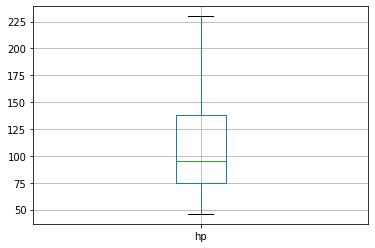

In [167]:
# Boxplot
df_2[['hp']].boxplot()

In [218]:
norm = StandardScaler()
col_norm = norm.fit_transform(df_2)

In [231]:
colunas = df_2.columns
df_3 = pd.DataFrame(col_norm, columns= colunas)
df_3.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,-1.171127,1.393053,1.372393,1.450681,1.414997,-1.221287,-1.327539
1,1.121226,-0.919105,-1.030290,-0.874768,-1.280086,-0.532829,0.875880
2,-0.786934,1.393053,0.930520,0.832210,0.518209,-1.565516,-1.602966
3,-1.043063,1.393053,1.832677,1.079598,0.886364,-1.909745,-1.602966
4,0.941936,-0.919105,-0.947439,-1.072679,-1.131408,0.499857,0.325025


In [232]:
# Valor Máximo de hp
df_3['hp'].max()

3.05870398977614

In [236]:
pca = PCA(n_components=7)
pca_fit = pca.fit_transform(df_3)
pca.explained_variance_ratio_

array([0.72371349, 0.12675138, 0.09126131, 0.02773591, 0.01766794,
       0.00798425, 0.00488572])

In [243]:
k_means = KMeans(n_clusters=3, random_state=42)
k_predict = k_means.fit_predict(df_3)
pd.Series(k_predict).value_counts()

1    95
0    91
2    75
dtype: int64

In [244]:
def eficiencia(coluna):
  if coluna > 25:
    return 1
  else:
    return 0

In [245]:
df_3['Eficiencia'] = df_2['mpg'].map(eficiencia)

In [246]:
df_3.head()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,Eficiencia
0,-1.171127,1.393053,1.372393,1.450681,1.414997,-1.221287,-1.327539,0
1,1.121226,-0.919105,-1.030290,-0.874768,-1.280086,-0.532829,0.875880,1
2,-0.786934,1.393053,0.930520,0.832210,0.518209,-1.565516,-1.602966,0
3,-1.043063,1.393053,1.832677,1.079598,0.886364,-1.909745,-1.602966,0
4,0.941936,-0.919105,-0.947439,-1.072679,-1.131408,0.499857,0.325025,1


In [248]:
x = df_3[['cylinders' ,'cubicinches' ,'hp' ,'weightlbs','time-to-60']]
y = df_3['Eficiencia']

In [251]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.3)

In [255]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(x_train, y_train)
y_predict = tree.predict(x_test)
accuracy_score(y_test, y_predict)

0.8734177215189873

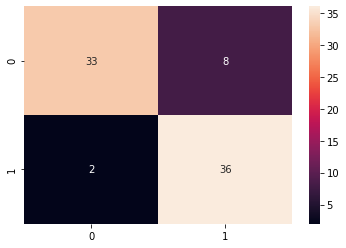

In [265]:
confusion = confusion_matrix(y_test, y_predict)
sns.heatmap(confusion, annot= True)

In [267]:
reg_log = LogisticRegression(random_state=42)

In [268]:
reg_log.fit(x_train, y_train)
reg_pred = reg_log.predict(x_test)
accuracy_score(y_test, reg_pred)

0.8607594936708861